In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from scipy import stats
from dfply import *
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from sklearn.cluster import KMeans
from sklearn.model_selection import *
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import *
from sklearn.ensemble import *
from sklearn.neural_network import *
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import *
from sklearn.inspection import PartialDependenceDisplay, plot_partial_dependence

from eli5.sklearn import  PermutationImportance
from eli5 import show_weights

import pprint

plt.style.use('fivethirtyeight')
plot_templ = "seaborn"
plot_width_small = 600
plpt_width_normal = 800
clr_conti = px.colors.diverging.RdYlGn
clr_conti_r = px.colors.diverging.RdYlGn_r
clr_discrete = px.colors.qualitative.Set1
clr_discrete_r = px.colors.qualitative.Set1_r

pp = pprint.PrettyPrinter(indent=4)

In [2]:
# Load Data Set 
df= pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
# Columns match description of the data set
# Some numeric (int, float) columns, string columns and boolean columns
# Preliminary check reveals no obvious missing data (column value counts match row counts)
# A few categorical columns need to be converted to str

In [7]:
# Check for null values in data
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
# Here we can see that there are no null values in the dataset.
#We do not need to fix or replace any null values in the dataset.

In [9]:
print("Total number of duplicate rows: ", df.duplicated().sum())

Total number of duplicate rows:  125


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
print("Total number of duplicate rows: ", df.duplicated().sum())

Total number of duplicate rows:  0


In [12]:
# Duplicate data is removed because it is determined that the sample size is sufficient
# Duplicate data should ideally be investigated but brevity sake the data is removed

In [13]:
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205,12205.000000,12205.000000,12205.000000,12205.000000,12205,12205,12205
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3329,NaN,NaN,NaN,NaN,10431,9346,10297
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,NaN,2.124211,2.357804,3.153298,4.073904,NaN,NaN,NaN
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,NaN,0.906823,1.710114,2.402340,4.016654,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [14]:
# Some have suspicously large values e.g. ProductRelated_Duration
# Large values could be because of web crawlers or browser was not closed by user

In [15]:
# Some of the categorical columns are currently stored as int and need to be converted to string
df.OperatingSystems = df.OperatingSystems.astype(str)
df.Browser = df.Browser.astype(str)
df.Region = df.Region.astype(str)
df.TrafficType = df.TrafficType.astype(str)
print("Columns converted to string")

Columns converted to string


In [16]:
# Checking for number of unique values for each feature

uniques = df.nunique(axis=0)
print(uniques)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


In [17]:
#Univariate Analysis

In [18]:
# Countplots
def plot_data_count(df, col, return_pct_share=True, hue=None, figsize=(12,6)):
    
    plt.figure(figsize=figsize)
    g = sns.countplot(data=df, x=col, hue=hue)
    for rect in g.patches:
        h = rect.get_height()
        w = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        g.annotate(f"{h}", (x+w/2, h), ha='center', va='bottom', fontsize=12)
    g.spines['top'].set_visible(False)
    g.spines['right'].set_visible(False)
    g.spines['left'].set_visible(False)
    
    plt.show()
    
    if return_pct_share:
        print("\n")
        print("Percent share for each category:")
        print(df[col].value_counts(normalize=True)*100)

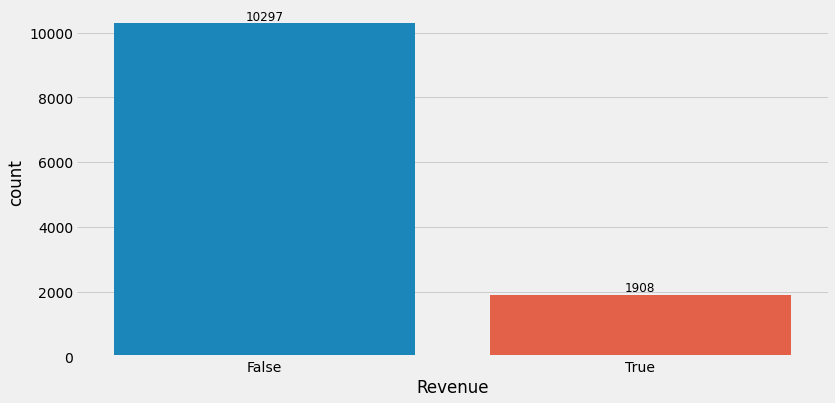



Percent share for each category:
False    84.367063
True     15.632937
Name: Revenue, dtype: float64


In [19]:
plot_data_count(df, 'Revenue')

In [20]:
#Only 15.47% percent of customers ended up making purchase a or more.
#So, the conversion rate is 15.47%

In [21]:
## We can see that the number of entries where the customer ended up not purchasing is much higher 
##that the number of entries where the customer ended up completing a transaction.
##This makes sense, as a majority of normal online shopping ends without a purchase.

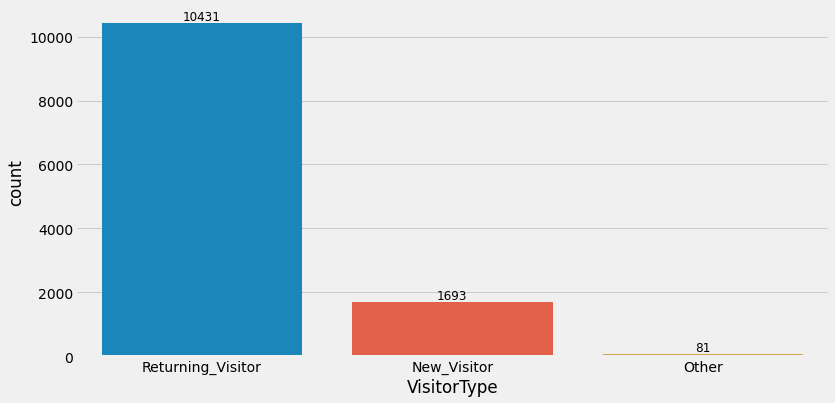



Percent share for each category:
Returning_Visitor    85.464973
New_Visitor          13.871364
Other                 0.663662
Name: VisitorType, dtype: float64


In [22]:
plot_data_count(df, 'VisitorType')

In [23]:
#85% of customers returns back to site, which is a good indication. Meaning that our customers are satisfifying with what they are getting.
#13.74% of customers are new customers.

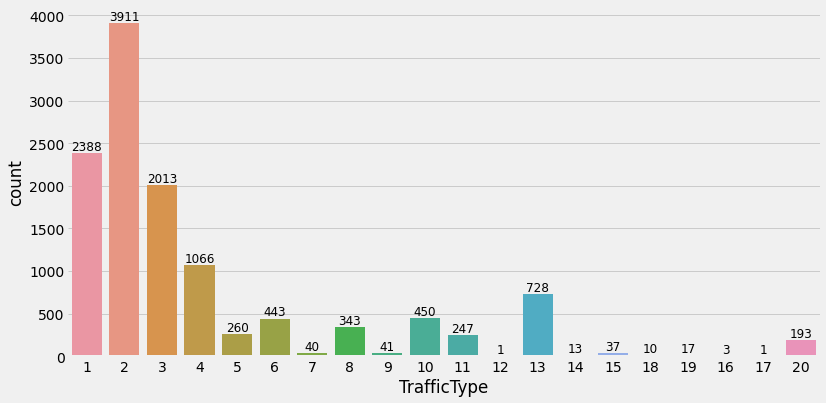



Percent share for each category:
2     32.044244
1     19.565752
3     16.493240
4      8.734125
13     5.964769
10     3.687014
6      3.629660
8      2.810324
5      2.130274
11     2.023761
20     1.581319
9      0.335928
7      0.327735
15     0.303154
19     0.139287
14     0.106514
18     0.081934
16     0.024580
12     0.008193
17     0.008193
Name: TrafficType, dtype: float64


In [24]:
plot_data_count(df, 'TrafficType')

In [25]:
#Most of our visitors are coming from traffic type 2 - around 32%
#total 83% of visitors coming from 5 major traffic type 1,2,3,4, and 13

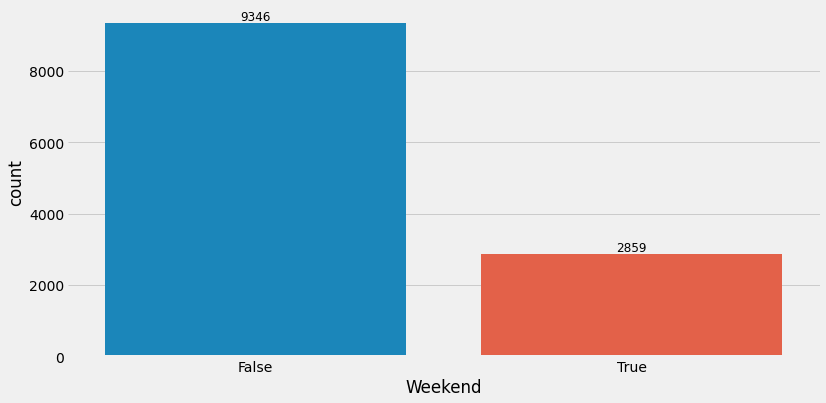



Percent share for each category:
False    76.575174
True     23.424826
Name: Weekend, dtype: float64


In [26]:
plot_data_count(df, 'Weekend')

In [27]:
#More visitors visit our site during weekdays than weekends

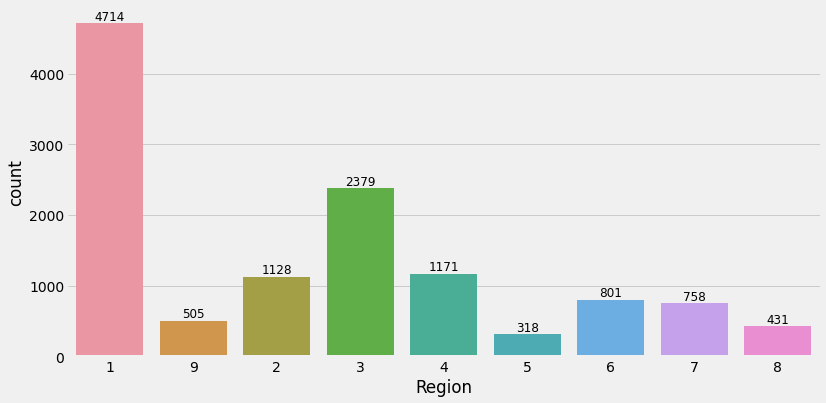



Percent share for each category:
1    38.623515
3    19.492011
4     9.594429
2     9.242114
6     6.562884
7     6.210569
9     4.137649
8     3.531340
5     2.605490
Name: Region, dtype: float64


In [28]:
plot_data_count(df, 'Region')

In [29]:
#Around 39% of visitors come from region one followed by 19.5% from region 3
# Region 1 accounts for most sales, and region 3 the second most.
# With this information, we can plan our marketing and supply chain activities in a better way. 
# For example, we might propose building a warehouse specifically catering to the needs of region 1 to increase delivery rates and ensure that products in the highest demand are always well stocked.

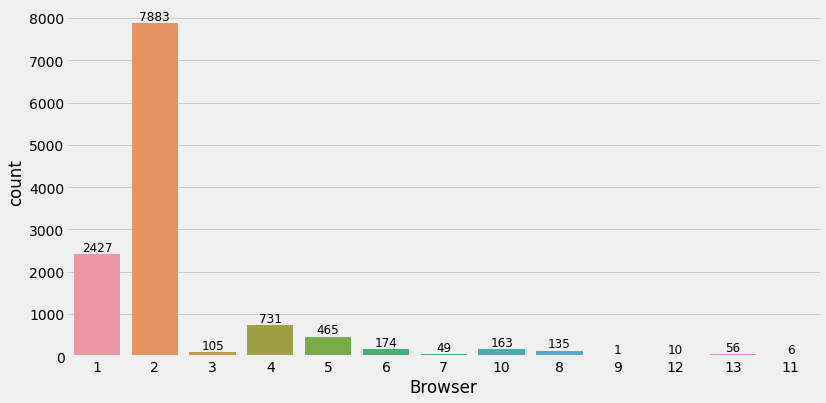



Percent share for each category:
2     64.588283
1     19.885293
4      5.989349
5      3.809914
6      1.425645
10     1.335518
8      1.106104
3      0.860303
13     0.458828
7      0.401475
12     0.081934
11     0.049160
9      0.008193
Name: Browser, dtype: float64


In [30]:
plot_data_count(df, 'Browser')

In [31]:
#64.5% percent of visitors are coming from browser 2 followed by 20% from browser 1.

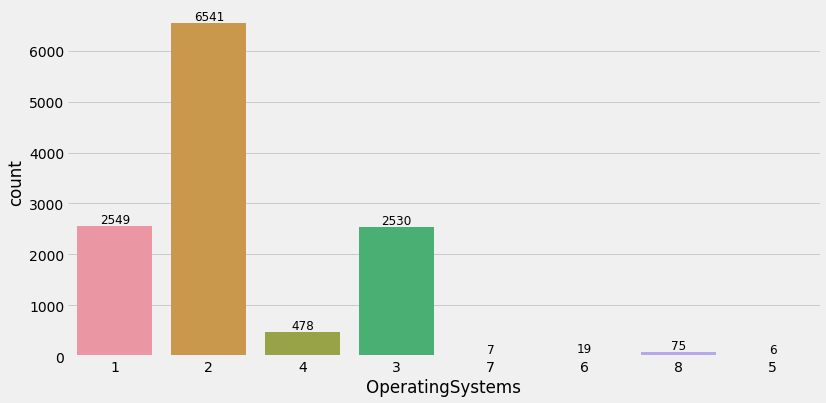



Percent share for each category:
2    53.592790
1    20.884883
3    20.729209
4     3.916428
8     0.614502
6     0.155674
7     0.057354
5     0.049160
Name: OperatingSystems, dtype: float64


In [32]:
plot_data_count(df, 'OperatingSystems')

In [33]:
#More than 50% of visitors are using operating system 2.
#Around 95% of visitors are coming from major three operating systems - os 2 (53.5%), os 1 (21%), os 3 (21%)

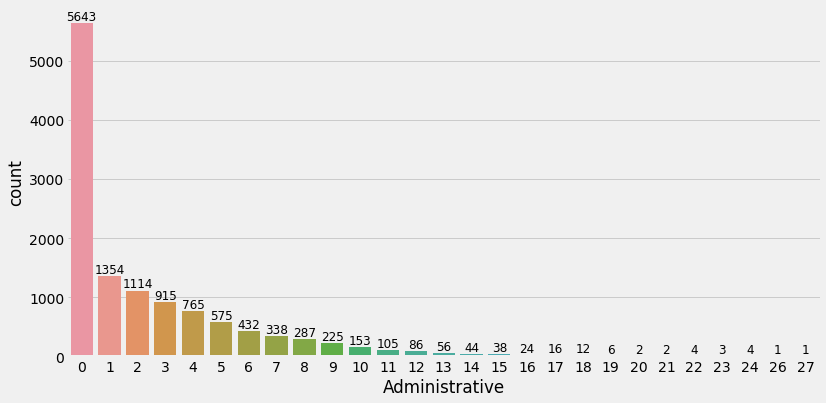



Percent share for each category:
0     46.235150
1     11.093814
2      9.127407
3      7.496927
4      6.267923
5      4.711184
6      3.539533
7      2.769357
8      2.351495
9      1.843507
10     1.253585
11     0.860303
12     0.704629
13     0.458828
14     0.360508
15     0.311348
16     0.196641
17     0.131094
18     0.098320
19     0.049160
24     0.032773
22     0.032773
23     0.024580
21     0.016387
20     0.016387
27     0.008193
26     0.008193
Name: Administrative, dtype: float64


In [34]:
plot_data_count(df, 'Administrative')

In [35]:
#users tend to visit page 0 the most often.

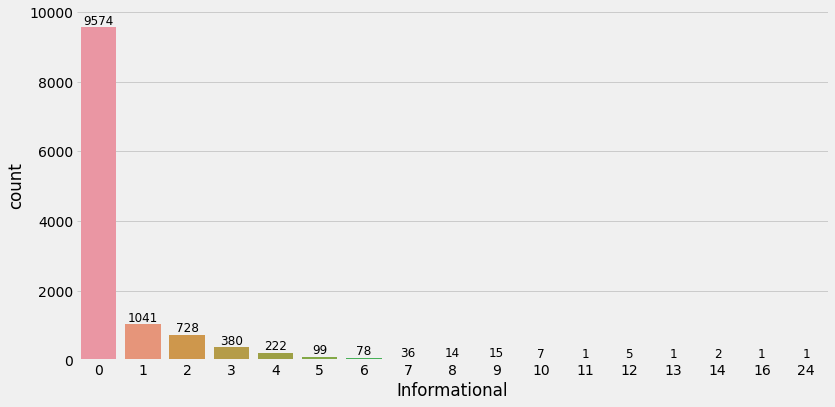



Percent share for each category:
0     78.443261
1      8.529291
2      5.964769
3      3.113478
4      1.818927
5      0.811143
6      0.639082
7      0.294961
9      0.122900
8      0.114707
10     0.057354
12     0.040967
14     0.016387
16     0.008193
11     0.008193
24     0.008193
13     0.008193
Name: Informational, dtype: float64


In [36]:
plot_data_count(df, 'Informational')

In [37]:
# we can see that Information page 0 has the highest number of visitors

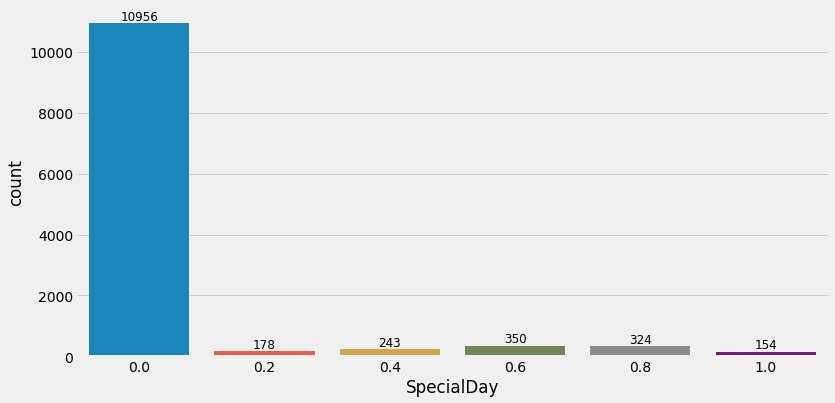



Percent share for each category:
0.0    89.766489
0.6     2.867677
0.8     2.654650
0.4     1.990987
0.2     1.458419
1.0     1.261778
Name: SpecialDay, dtype: float64


In [38]:
plot_data_count(df, 'SpecialDay')

In [39]:
# we can see that special days have no impact on the number of visitors to our website.

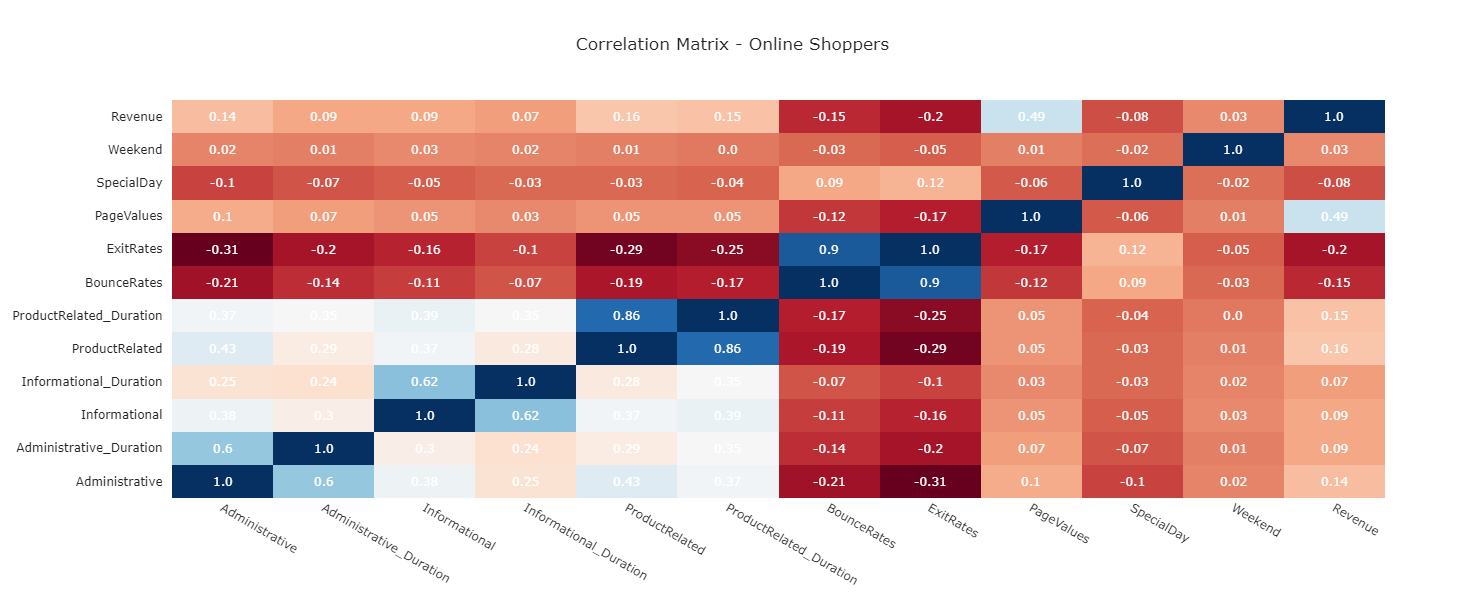

In [40]:
corr_data = df.corr()
corr_data = corr_data.round(2)

data = corr_data.fillna(0).to_numpy().tolist()
xvals = corr_data.index.values.tolist()
yvals = corr_data.columns.to_list()

fig = ff.create_annotated_heatmap(
    data, 
    x=xvals, 
    y=yvals, 
    annotation_text=data,
    colorscale="RdBU")
fig.update_xaxes(side="bottom")    
fig.update_layout(
    title_text = "Correlation Matrix - Online Shoppers",
    template=plot_templ,
    width=1000,
    height=600)
fig.show()

In [41]:
#The correlation plot shows ~ 6 attributes have decent correlation (relative to the data) with the target Revenue:

# PageValues
# ExitRates
# ProductRelated
# ProductRelated_Duration
# BounceRates
# Administrative

In [42]:
#Bivariate Analysis

In [43]:
def chi_squared_test_result(col):
    
    x = df.groupby(['Revenue', col])[col].count().unstack(1).fillna(0).astype('int')
    test_results = stats.chi2_contingency(x.values)
    pval = test_results[1]
    if pval<0.05:
        print(f"P-value: {pval:.4f} - \n\nIt means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on {col}.**")
    else:
        print(f"P-value: {pval:.4f} - \n\nFailed to reject null hypothesis. Both **Revenue is independent on {col}.**")

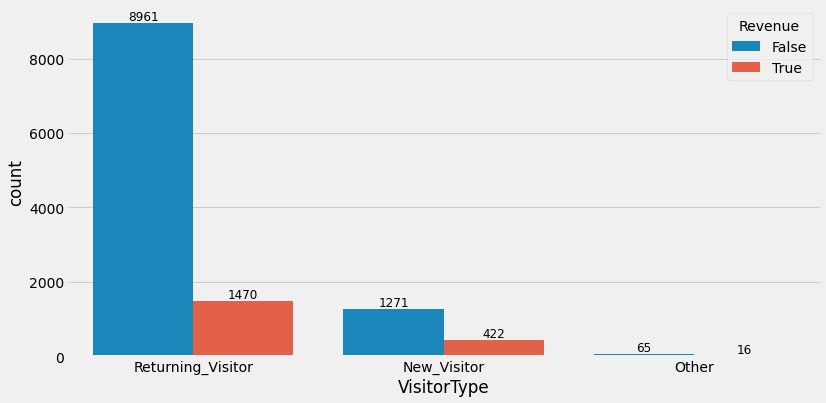

In [44]:
## Visitor type
plot_data_count(df, col='VisitorType', return_pct_share=False, hue='Revenue')

In [45]:
# More revenue conversion happens for returning customers than new customers.
# We need to give incentives to new customers to make purchase with us.
# First let's check whether Revenue is independent or dependent on visitor type by chi-squared test

In [46]:
chi_squared_test_result('VisitorType')

P-value: 0.0000 - 

It means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on VisitorType.**


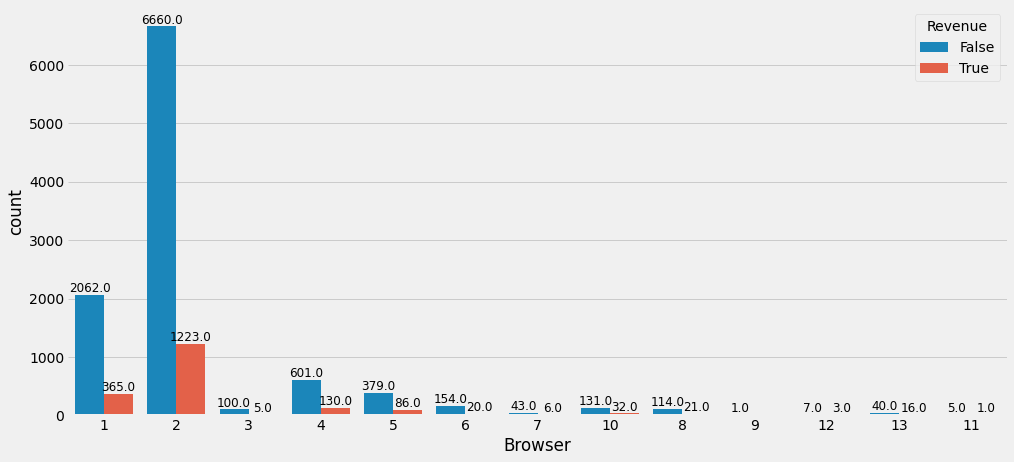

P-value: 0.0038 - 

It means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on Browser.**


In [47]:
## Revenue and Browser

plot_data_count(df, col='Browser', return_pct_share=False, hue='Revenue', figsize=(15,7))

# chi-squared test
chi_squared_test_result('Browser')

In [48]:
# more revenue-generating transactions have been performed from Browser 2. 
#Even though Browser 1 creates a considerable number of sessions, the conversion rate is low. 
#This is something we need to investigate further.

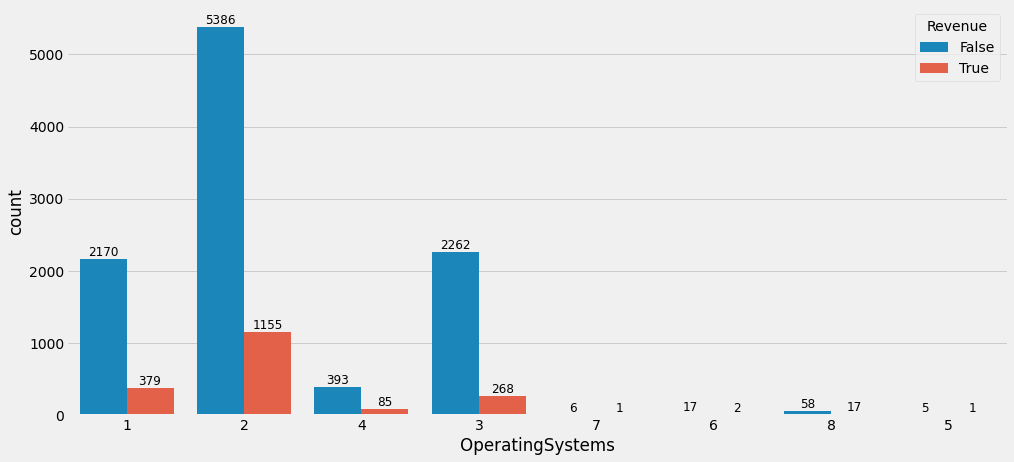

P-value: 0.0000 - 

It means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on OperatingSystems.**


In [49]:
## Revenue and OperatingSystems

plot_data_count(df, col='OperatingSystems', return_pct_share=False, hue='Revenue', figsize=(15,7))

# chi-squared test
chi_squared_test_result('OperatingSystems')

In [50]:
# More revenue-generating transactions happened with OS 2 than the other types.

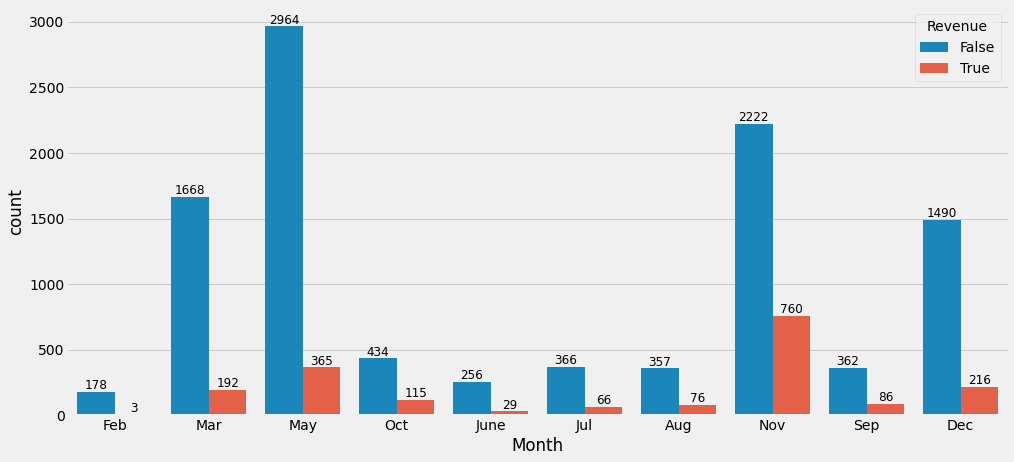

P-value: 0.0000 - 

It means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on Month.**


In [51]:
## Revenue and Month

plot_data_count(df, col='Month', return_pct_share=False, hue='Revenue', figsize=(15,7))

# chi-squared test
chi_squared_test_result('Month')

In [52]:
# Website visitors may be high in May, 
#but we can observe from the preceding bar plot that a greater number of purchases were made in the month of November.

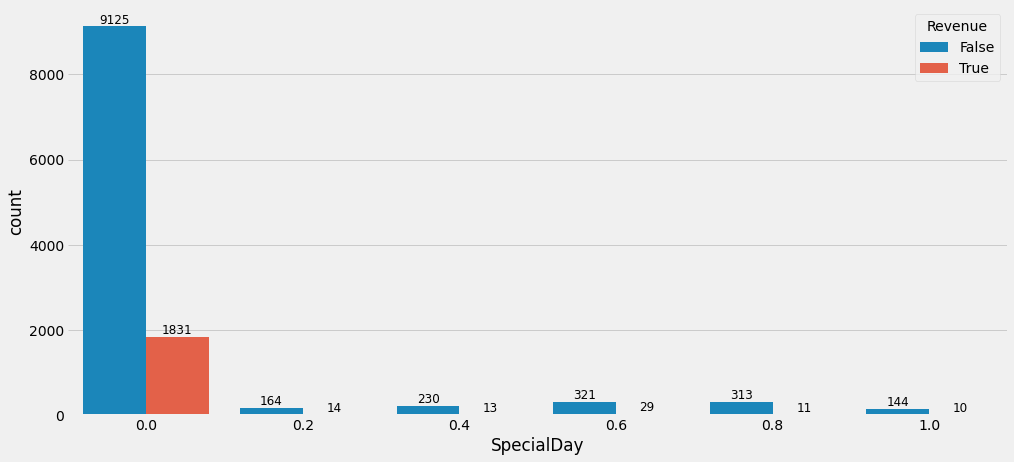

P-value: 0.0000 - 

It means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on SpecialDay.**


In [53]:
## Revenue and special days

plot_data_count(df, col='SpecialDay', return_pct_share=False, hue='Revenue', figsize=(15,7))

# chi-squared test
chi_squared_test_result('SpecialDay')

In [54]:
df[['SpecialDay','Month','Revenue']].groupby('Month').sum()

,SpecialDay,Revenue
Month,,
Aug,0.0,76
Dec,0.0,216
Feb,43.0,3
Jul,0.0,66
June,0.0,29
Mar,0.0,192
May,713.0,365
Nov,0.0,760
Oct,0.0,115


In [55]:
pd.crosstab(df['Weekend'],df['Revenue'], margins=True)

Revenue,False,True,All
Weekend,,,
False,7937,1409,9346
True,2360,499,2859
All,10297,1908,12205


In [56]:
discrete_features = ['Administrative', 'Informational', 
                     'ProductRelated', 'Month', 
                     'OperatingSystems', 'Browser', 
                     'Region', 'TrafficType', 
                     'VisitorType', 'Weekend']

chi_squared_df = pd.DataFrame(columns=['feature', 'pval', 'dependent'])

for i, col in enumerate(discrete_features):
    x = df.groupby(['Revenue', col])[col].count().unstack(1).fillna(0).astype('int')
    res = stats.chi2_contingency(x.values)
    pval = res[1]
    
    if pval < 0.05:
        dependent = 'Yes'
    else:
        dependent = 'No'
        
    chi_squared_df.loc[i] = [col, round(pval,3), dependent]
    
chi_squared_df

,feature,pval,dependent
0,Administrative,0.000,Yes
1,Informational,0.000,Yes
2,ProductRelated,0.000,Yes
3,Month,0.000,Yes
4,OperatingSystems,0.000,Yes
5,Browser,0.004,Yes
6,Region,0.288,No
7,TrafficType,0.000,Yes
8,VisitorType,0.000,Yes
9,Weekend,0.002,Yes


In [57]:
# From chi-squared test we got that except Region all other discrete features are dependent on Revenue feature.

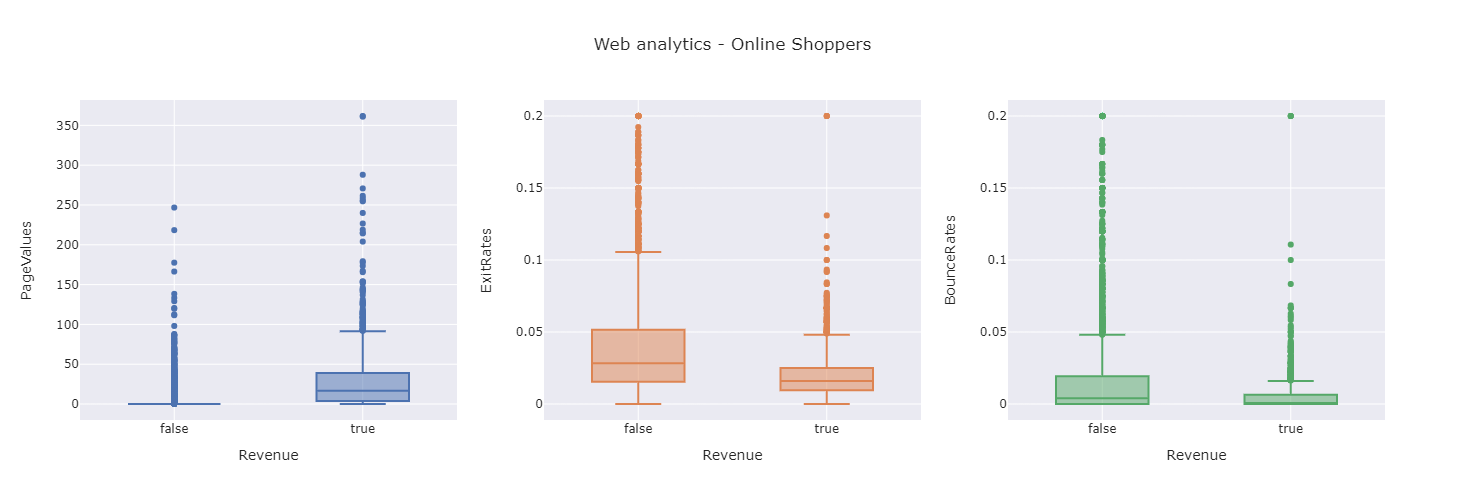

In [58]:
# web analytics

fig = make_subplots(rows=1, cols=3)
fig.append_trace(
    go.Box(
        x=df.Revenue,
        y=df.PageValues        
    ), row=1, col=1
)
fig.append_trace(
    go.Box(
        x=df.Revenue,
        y=df.ExitRates                
    ), row=1, col=2
)
fig.append_trace(
    go.Box(
        x=df.Revenue,
        y=df.BounceRates                
    ), row=1, col=3
)
fig.update_xaxes(title_text="Revenue")
fig.update_yaxes(title_text="PageValues", row=1, col=1)
fig.update_yaxes(title_text="ExitRates", row=1, col=2)
fig.update_yaxes(title_text="BounceRates", row=1, col=3)
fig.update_layout(
    title_text = "Web analytics - Online Shoppers",
    template=plot_templ,
    showlegend=False,
    width=1200,
    height=500)
fig.show()

In [59]:
# PageValues, ExitRates and BounceRates shows some difference between website visitors that purchased and those that did not.

In [60]:
df[['BounceRates','Revenue']].groupby('Revenue').mean()

,BounceRates
Revenue,
False,0.023197
True,0.005117


In [61]:
df[['ExitRates','Revenue']].groupby('Revenue').mean()

,ExitRates
Revenue,
False,0.045526
True,0.019555


In [62]:
df[['PageValues','Revenue']].groupby('Revenue').mean()

,PageValues
Revenue,
False,1.999985
True,27.264518


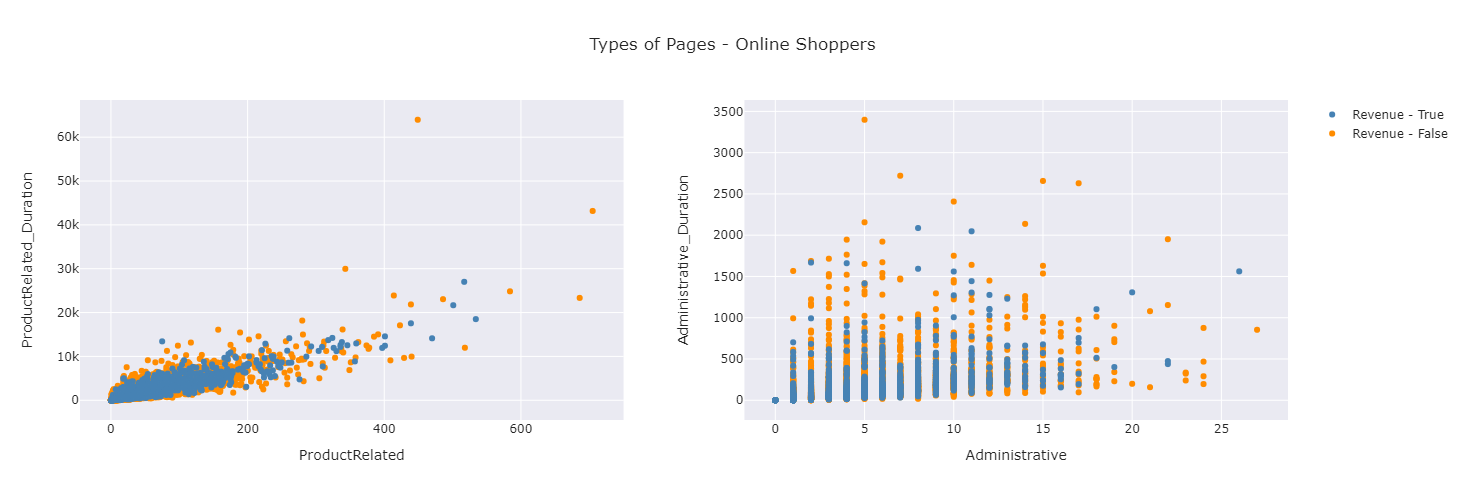

In [63]:
# Type of pages

rev_values = df.Revenue.unique()
col_map = {
    "1": "steelblue",
    "2": "darkorange"
}
fig = make_subplots(rows=1, cols=2)

for rev in rev_values:
    col = "1" if rev == True else "2"
    vis_data = df[df["Revenue"] == rev]
    fig.add_trace(
        go.Scatter(
            x=vis_data.ProductRelated,
            y=vis_data.ProductRelated_Duration,
            mode="markers",
            marker_color=col_map[col], 
            legendgroup=f"group{col}",
            name=f"Revenue - {rev}",
            showlegend=True
        ), row=1, col=1
    )
    fig.add_trace(
        go.Scatter(
            x=vis_data.Administrative,
            y=vis_data.Administrative_Duration,
            mode="markers",
            marker_color=col_map[col],
            legendgroup=f"group{col}",
            name=f"Revenue - {rev}",  
            showlegend=False                                         
        ), row=1, col=2
    )
fig.update_xaxes(title_text="ProductRelated", row=1, col=1)
fig.update_xaxes(title_text="Administrative", row=1, col=2)
fig.update_yaxes(title_text="ProductRelated_Duration", row=1, col=1)
fig.update_yaxes(title_text="Administrative_Duration", row=1, col=2)
fig.update_layout(
    legend_traceorder="reversed",
    title_text = "Types of Pages - Online Shoppers",
    template = plot_templ,
    width=1200,
    height=500)
fig.show()

In [64]:
# ProductRelated and Administrative page type attributes shows some seperation between website visitors that purchased and those that did not.

In [5]:
# Modelling

In [6]:
# Encoding revenue and weekend
df.Revenue = df.Revenue.apply(lambda x: 1 if x == True else 0)
df.Weekend = df.Weekend.apply(lambda x: 1 if x == True else 0)
print("Encoding revenue and weekend complete")

# Encoding categorical attributes
cat_attributes = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
encoder = OneHotEncoder(handle_unknown='ignore')
trans = encoder.fit_transform(df.loc[:, cat_attributes].values)
enc_data = pd.DataFrame(
    trans.toarray(), 
    index=df.index.values,
    columns=encoder.get_feature_names(cat_attributes))
prep_data = pd.merge(df, enc_data, left_index=True, right_index=True)
prep_data.drop(columns=cat_attributes, inplace=True)
print("Encoding categorical attributes complete")

# Normalize numeric attributes
features = (prep_data >> select(~X.Revenue))
mm_scaler = MinMaxScaler()
features = mm_scaler.fit_transform(features)
print("Normalize numeric attributes complete")


# Train and test split
target = prep_data['Revenue']
test_size=0.2
x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=test_size, shuffle=True, random_state=1, stratify=target) 
print(f"Train and test data with dim: {x_train.shape} and {x_test.shape} complete")    

Encoding revenue and weekend complete
Encoding categorical attributes complete
Normalize numeric attributes complete
Train and test data with dim: (9864, 74) and (2466, 74) complete


In [7]:
def frame_report(actual, predicted, labels=[1,0], names=["True", "False"]):
    report = classification_report(
        actual, 
        predicted, 
        labels=labels, 
        target_names=names, 
        output_dict=True)
    df_report = pd.DataFrame.from_dict(report).transpose()
    style = df_report.style.set_caption('<b>Classification Report</b>').background_gradient(
        cmap='viridis', subset=pd.IndexSlice['True':'False', :'f1-score']) 
    return style    

def frame_matrix(actual, predicted, cols=["False", "True"]):
    cm = confusion_matrix(actual, predicted)
    frame = pd.DataFrame(cm, index=cols, columns=cols)    
    style = frame.style.set_caption('<b>Confusion Matrix<b/>').background_gradient(cmap='viridis') 
    return style

In [8]:
# Baseline classifier

In [9]:
# Logistic Regression Model
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
predicted = model.predict(x_test)
frame_report(y_test, predicted)

,precision,recall,f1-score,support
True,0.785714,0.316754,0.451493,382.000000
False,0.887111,0.984165,0.933121,2084.000000
accuracy,0.880779,0.880779,0.880779,0.880779
macro avg,0.836413,0.650459,0.692307,2466.000000
weighted avg,0.871404,0.880779,0.858514,2466.000000


In [10]:
print("Basline model ROC AUC score: ", roc_auc_score(y_test, predicted))

Basline model ROC AUC score:  0.6504594969400367


In [11]:
# The weighted average f1 score of 0.84 seems great but it's not applicable as the target label is unbalanced with significantly more examples of website visits that did not result in revenue. 
# More reasonable metrics would be the macro average f1 score (~0.65) and roc auc score (0.62). Given the scores of the aforementioned metrics, the baseline classifier (Logistic Regression) performance is mediocre.

In [12]:
params_space = {   
    'criterion': 'entropy',
    'max_depth': 16,
    'max_features': 'auto',
    'min_samples_leaf': 10,
    'min_samples_split': 5,
    'n_estimators': 35
}
select_clf = RandomForestClassifier(random_state=5)
select_clf.set_params(**params_space)
feat_selector = SelectFromModel(select_clf)
feat_selector.fit(x_train, y_train)
feats = feat_selector.transform(x_train)

In [13]:
params_space = {
    'activation': 'relu',
    'alpha': 0.0001,
    'early_stopping': True,
    'hidden_layer_sizes': (16, 128, 16),
    'learning_rate_init': 0.001,
    'max_iter': 1000,
    'random_state': 2,
    'solver': 'adam' 
}
model = MLPClassifier(random_state=5)
model.set_params(**params_space)
model.fit(feats, y_train)
predicted = model.predict(feat_selector.transform(x_test))
frame_report(y_test, predicted)

,precision,recall,f1-score,support
True,0.688623,0.602094,0.642458,382.000000
False,0.928705,0.950096,0.939279,2084.000000
accuracy,0.896188,0.896188,0.896188,0.896188
macro avg,0.808664,0.776095,0.790869,2466.000000
weighted avg,0.891515,0.896188,0.893299,2466.000000


In [14]:
print("Multilayer Perceptron model ROC AUC score: ", roc_auc_score(y_test, predicted))

Multilayer Perceptron model ROC AUC score:  0.7760951050637618


In [15]:
frame_matrix(y_test, predicted)

,False,True
False,1980,104
True,152,230


In [16]:
# What are the most important features?

In [17]:
idx = feat_selector.get_support()
cols = (prep_data >> select(~X.Revenue)).columns[idx]
perm = PermutationImportance(model, random_state=1).fit(feat_selector.transform(x_test), y_test)
show_weights(perm, feature_names = cols.tolist())

Weight,Feature
0.1243 ± 0.0072,PageValues
0.0311 ± 0.0070,Month_Nov
0.0215 ± 0.0060,Month_May
0.0042 ± 0.0017,ExitRates
0.0012 ± 0.0021,BounceRates
0.0008 ± 0.0016,ProductRelated_Duration
0.0003 ± 0.0014,ProductRelated
-0.0002 ± 0.0036,Administrative
-0.0013 ± 0.0008,Administrative_Duration


In [85]:
# What feature values impact the classifier?

Text(0, 0.5, 'Prediction')

<Figure size 432x288 with 0 Axes>

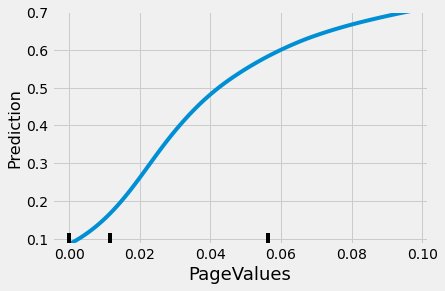

In [86]:
fig = figure()
test_feats = feat_selector.transform(x_test)
disp = plot_partial_dependence(model, test_feats, [6])
plt.xlabel('PageValues', fontsize=18)
plt.ylabel('Prediction', fontsize=16)

In [18]:
# Preperung the data for two other algorithms to test

In [19]:
# one hot encoding
df1 = pd.get_dummies(df)
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
# Label encoding of revenue
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Revenue'] = le.fit_transform(df1['Revenue'])
df1['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [21]:
df1['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [22]:
# Label encoding of weekend

df1['Weekend'] = le.fit_transform(df1['Weekend'])
df1['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [23]:
# Splitting dependent and independent variables(columns)
y = df1['Revenue']
x = df1.drop(['Revenue'], axis = 1)

# checking the shapes
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (12330, 28)
Shape of y:  (12330,)


In [24]:
# Splitting of the Data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.2, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (9864, 28)
Shape of y_train : (9864,)
Shape of x_test : (2466, 28)
Shape of y_test : (2466,)


In [25]:
# Modelling : Support Vector Machine

In [26]:
from sklearn import svm

In [27]:
# model define and training

model = svm.SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

Training Accuracy:  0.8514801297648013
Testing Accuracy:  0.8317112733171127


In [28]:
#The model which is just build by Support vector machine gives us training accuracy 99.5% and testing accuracy 82.85%

In [29]:
import sklearn.metrics as metrics

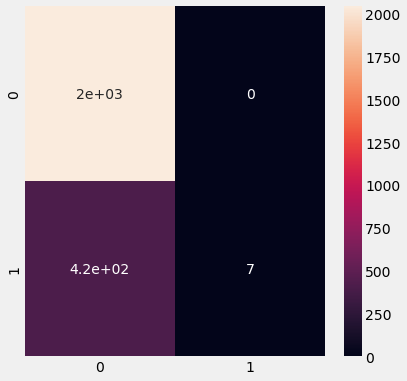

In [30]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [125]:
# classification report
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2063
           1       1.00      0.01      0.02       378

    accuracy                           0.85      2441
   macro avg       0.92      0.50      0.47      2441
weighted avg       0.87      0.85      0.78      2441



In [126]:
# Modelling: Naive Bayes

In [127]:
# model define and training
model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

Training Accuracy:  0.7513314215485457
Testing Accuracy:  0.740270380991397


In [128]:
# The model which is just build by Naive Bayes(Gaussian) gives us training accuracy 79.83% and testing accuracy 79.03%

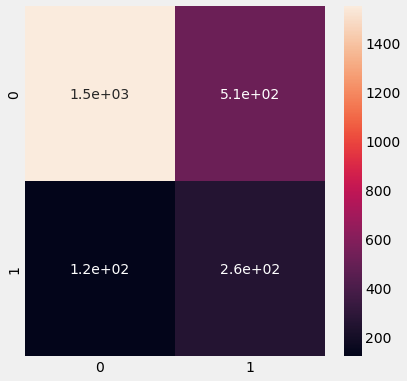

In [129]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [113]:
# classification report
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      2063
           1       0.33      0.68      0.45       378

    accuracy                           0.74      2441
   macro avg       0.63      0.72      0.64      2441
weighted avg       0.84      0.74      0.77      2441



In [131]:
# Random Forest Classifier 

In [135]:
rfc = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc.fit(x_train, y_train)

# make prediction using our test data and model
y_pred_rfc = rfc.predict(x_test)
y_prob_rfc = rfc.predict_proba(x_test)[:, 1]

# evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

Training Accuracy:  0.7513314215485457
Testing Accuracy:  0.740270380991397


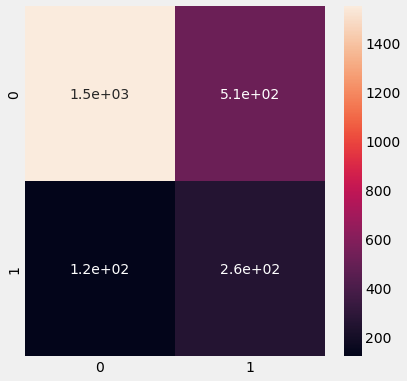

In [136]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [137]:
# classification report
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      2063
           1       0.33      0.68      0.45       378

    accuracy                           0.74      2441
   macro avg       0.63      0.72      0.64      2441
weighted avg       0.84      0.74      0.77      2441



In [114]:
# Summary Table based on Two Learning Algorithm

In [139]:
precision = ['Naive Bayes', 'precision', 0.91, 0.42]
recall = ['Naive Bayes', 'recall', 0.83, 0.61]
f1_score = ['Naive Bayes', 'f1_score', 0.87, 0.50 ]
precision2 = ['Support Vector Machine', 'precision', 0.83, 0.00 ]
recall2 = ['Support Vector Machine', 'recall', 1.0, 0.00 ]
f1_score2 = ['Support Vector Machine', 'f1_score', 0.91, 0.00 ]
precision3 = ['Random Forest', 'precision',  0.93, 0.33]
recall3= ['Random Forest', 'recall',  0.75, 0.68]
f1_score3= ['Random Forest', 'f1-score',  0.83, 0.45]
table = pd.DataFrame([precision, precision2, precision3, recall, recall2, recall3, f1_score, f1_score2, f1_score3])
table.columns = ['model_name', 'metrics', 'Is_Revenue(False)', 'Is_Revenue(True)']
table

,model_name,metrics,Is_Revenue(False),Is_Revenue(True)
0,Naive Bayes,precision,0.91,0.42
1,Support Vector Machine,precision,0.83,0.00
2,Random Forest,precision,0.93,0.33
3,Naive Bayes,recall,0.83,0.61
4,Support Vector Machine,recall,1.00,0.00
5,Random Forest,recall,0.75,0.68
6,Naive Bayes,f1_score,0.87,0.50
7,Support Vector Machine,f1_score,0.91,0.00
8,Random Forest,f1-score,0.83,0.45
